In [1]:
import pandas as pd
import numpy as np
import fs_qe as fq

%matplotlib inline

Here we show the total asset variable for all qualified US firms in Orbis from 2010 to 2019.
- Total number of qualified US firms with the total asset variable in Orbis: $39,601$,
- All values of the total assets are measured in US $\$000$.

# 1. Pre-processing the data

In [2]:
%%time
df = pd.read_csv('data/us.csv')
df1 = df[['id', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].set_index('id')

CPU times: user 147 ms, sys: 19.2 ms, total: 166 ms
Wall time: 165 ms


In [3]:
df4 = fq.preprocessdata(df1)

# 2 the firm-growth as $\ln (S_+) - \ln (S) $ against firm size $S$ or log firm size $\ln S$

## 2.1 pre-process the data

In [5]:
df7 = fq.preprocess_data0(df4)

df7['logtasset_inv'] = np.reciprocal(df7['logtasset'])
df8 = df7[df7['logtasset_inv'] != np.inf]
df9 = df8[df8['logtasset'] > 8 ]

df8.to_csv('data/usa.csv')
df9.to_csv('data/usa_chop_log8.csv')

df9

/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/Desktop/1_papers_w:john/04_firm_size/github/firm_size_empirics/orbis/firm_growth_asset/fs_qe.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['fgrow_log'] = df6.groupby('id')['logtasset'].diff(periods=-1) * 100
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in reciprocal
  result = getat

,id,tasset,logtasset,fgrow_log,logtasset_inv
year,,,,,
2010,1,180782000.0,19.012802,-6.749972,0.052596
2011,1,193406000.0,19.080302,-4.893148,0.052410
2012,1,203105000.0,19.129234,-0.807152,0.052276
2013,1,204751000.0,19.137305,0.617774,0.052254
2014,1,203490000.0,19.131127,1.939669,0.052271
...,...,...,...,...,...
2018,39566,971579.0,13.786678,87.515404,0.072534
2018,39582,96026.0,11.472374,0.000000,0.087166
2017,39592,99948.0,11.512405,0.000000,0.086863


## 2.2 firm-size growth plots

### 2.2.1 without chopping

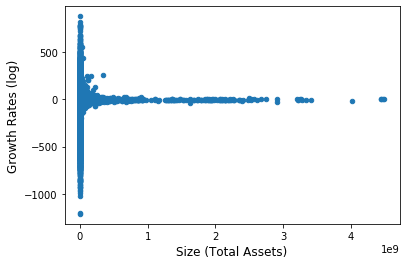

In [6]:
fq.scatterplot(df8)

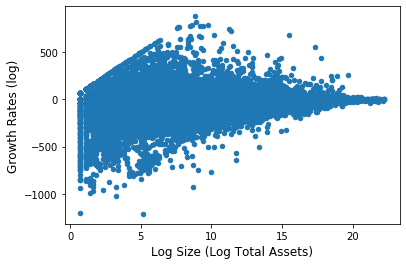

In [7]:
fq.scatterplot(df8, x='logtasset', xlabel='Log Size (Log Total Assets)')

### 2.2.2 chopping smaller than $\log 8$

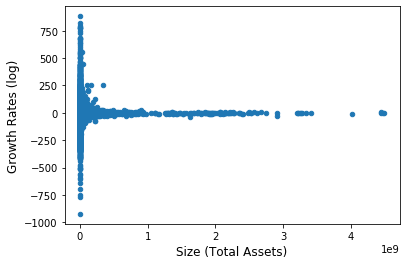

In [8]:
fq.scatterplot(df9)

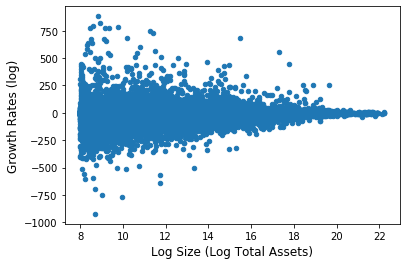

In [9]:
fq.scatterplot(df9, x='logtasset', xlabel='Log Size (Log Total Assets)')

# 3 generating plots with a $45$-degree line

## 3.1 Process data

In [10]:
df9 = fq.process45line(df4)

/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df9.to_csv('data/usa_ss.csv')
df10 = df9[df9['logtasset'] > 8 ]
df10.to_csv('data/usa_ss_chop_log8.csv')

df10

,id,tasset,logtasset,tasset_prev,logtasset_prev
year,,,,,
2011,1,193406000.0,19.080302,180782000.0,19.012802
2012,1,203105000.0,19.129234,193406000.0,19.080302
2013,1,204751000.0,19.137305,203105000.0,19.129234
2014,1,203490000.0,19.131127,204751000.0,19.137305
2015,1,199581000.0,19.111731,203490000.0,19.131127
...,...,...,...,...,...
2019,39566,404952.0,12.911524,971579.0,13.786678
2019,39582,96026.0,11.472374,96026.0,11.472374
2018,39592,99948.0,11.512405,99948.0,11.512405


## 3.2 Scatter Plots and approximation without chopping

### 3.2.1 Scatter Plots with Linear Regression Approximation (with 45 degree line)

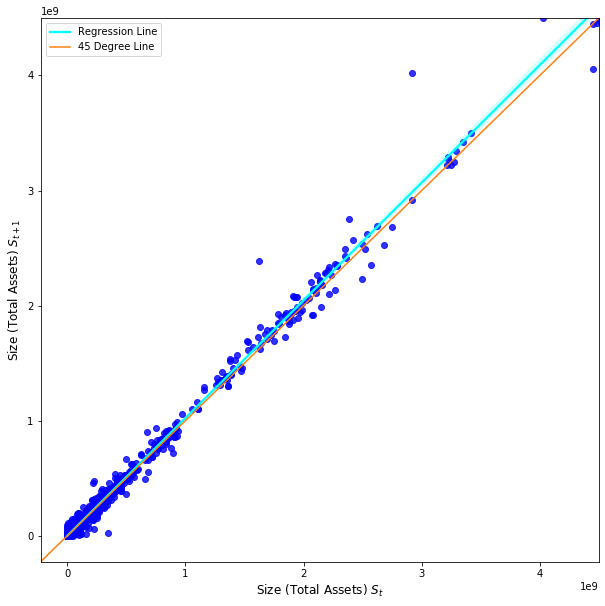

In [12]:
fq.plots(df9, reg=True)

## 3.3 Scatter Plots with 3rd-Degree Polynomial Approximation (with 45 degree line)

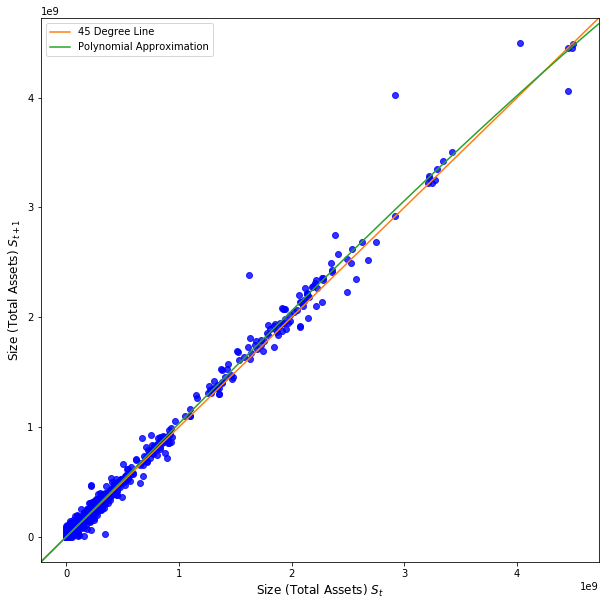

In [13]:
fq.plots(df9, x='tasset_prev', reg=False)

## 3.3 Scatter Plots and approximation with chopping of $\log 8$

### 3.3.1 Scatter Plots with Linear Regression Approximation (with 45 degree line)

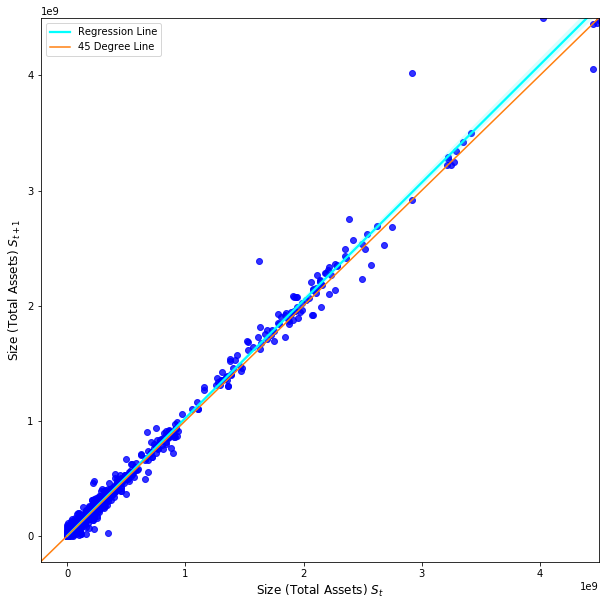

In [14]:
fq.plots(df10, x='tasset_prev', reg=True)

## 3.3 Scatter Plots with 3rd-Degree Polynomial Approximation (with 45 degree line)

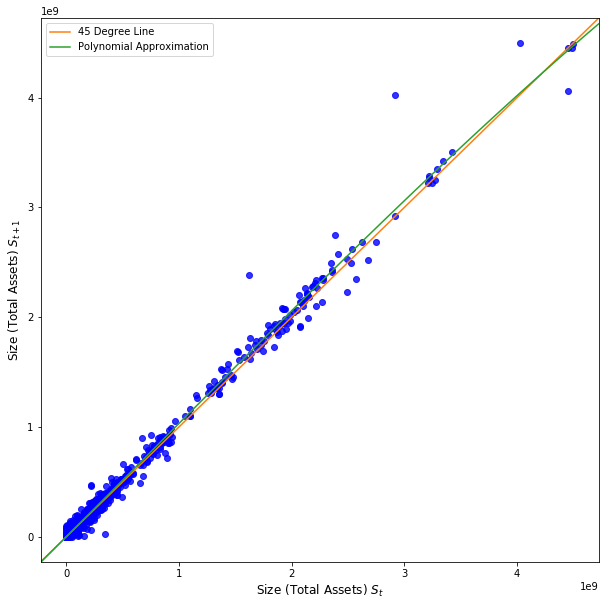

In [15]:
fq.plots(df10, x='tasset_prev', reg=False)